In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #reduces range from 0-255 to between 0-1 for better greyscale

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
np.shape(x_train)

(60000, 28, 28)

In [4]:
print(x_train[0].round(1))

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.5 0.5
  0.7 0.1 0.7 1.  1.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.4 0.6 0.7 1.  1.  1.  1.  1.
  0.9 0.7 1.  0.9 0.8 0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.4 0.3 0.3 0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.9 1.  1.  1.  1.  1.  0.8 0.7 1.  0

np.uint8(7)

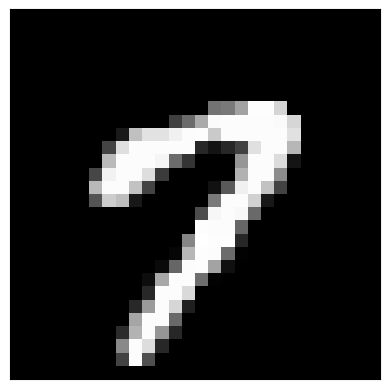

In [5]:
plt.imshow(x_train[15],cmap='gray')
plt.xticks([])
plt.yticks([])
y_train[15]

In [ ]:
clf = LogisticRegression(C=1e15,
                         multi_class='multinomial', penalty='l2',solver='sag', tol=0.01)
# fit data
clf.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])

# compute accuracy
score = clf.score(np.array(x_test).reshape((10000,784)), y_test)

/opt/anaconda3/envs/mphil_m1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
score

0.9028

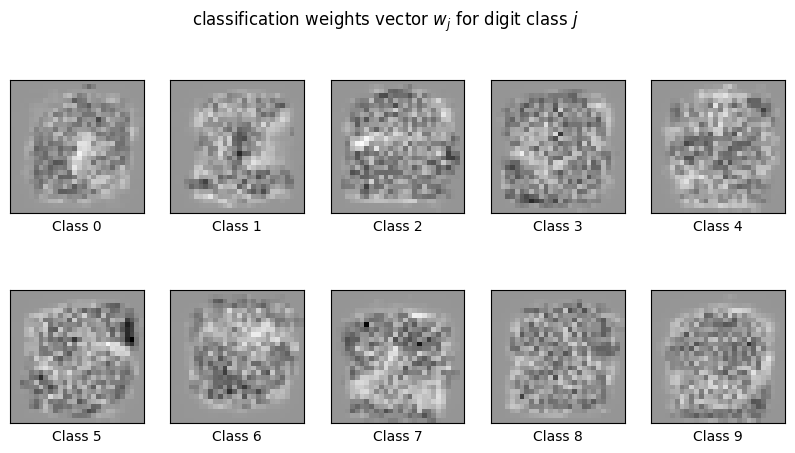

In [8]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

In [9]:
score

0.9028

In [10]:
clf.predict(np.array(x_test).reshape((10000,784))[:10])

/Users/sven.krippendorf/virtual-environments/kalu06-metal/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sven.krippendorf/virtual-environments/kalu06-metal/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sven.krippendorf/virtual-environments/kalu06-metal/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [11]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

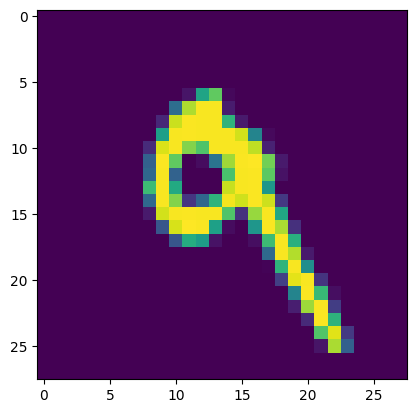

In [12]:
plt.imshow(x_test[7])